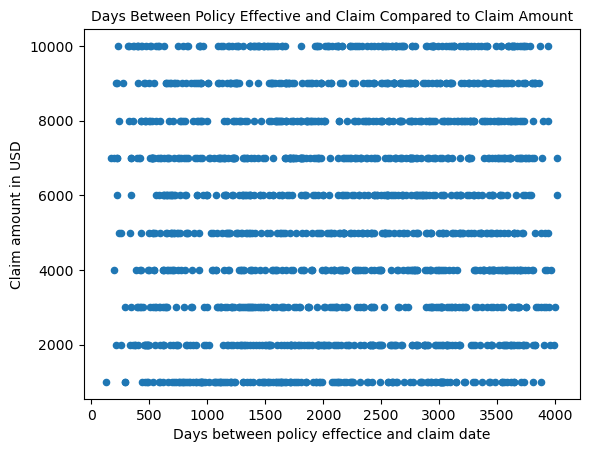

      Days  CLAIM_AMOUNT
7      509          8000
8      334          5000
11    1404          8000
15    3397          9000
18     940          8000
...    ...           ...
9975   621          4000
9980   646          9000
9990   713          7000
9995  2630          1000
9998  1967          2000

[1574 rows x 2 columns]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('insurance_data.csv')
index=data['INSURANCE_TYPE']=='Motor'
data=data[index]
data=data[['POLICY_EFF_DT','REPORT_DT','CLAIM_AMOUNT']]
time=data[['POLICY_EFF_DT','REPORT_DT']]=data[['POLICY_EFF_DT','REPORT_DT']].applymap(np.array)

mark=0
for i in data.REPORT_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data.iloc[mark, 1] = i
    mark=mark+1
mark=0
for i in data.POLICY_EFF_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data.iloc[mark, 0] = i
    mark=mark+1
data['Days'] = data.REPORT_DT.sub(data.POLICY_EFF_DT)
data=data[['Days','CLAIM_AMOUNT']]

dataplot=pd.DataFrame(data)
dataplot.plot.scatter(x="Days",y="CLAIM_AMOUNT")
plt.ylabel("Claim amount in USD")
plt.xlabel("Days between policy effectice and claim date")
plt.title("Days Between Policy Effective and Claim Compared to Claim Amount", fontsize=10, loc='center')
plt.show()
print(data)
